In [554]:
import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["font.size"] = 20

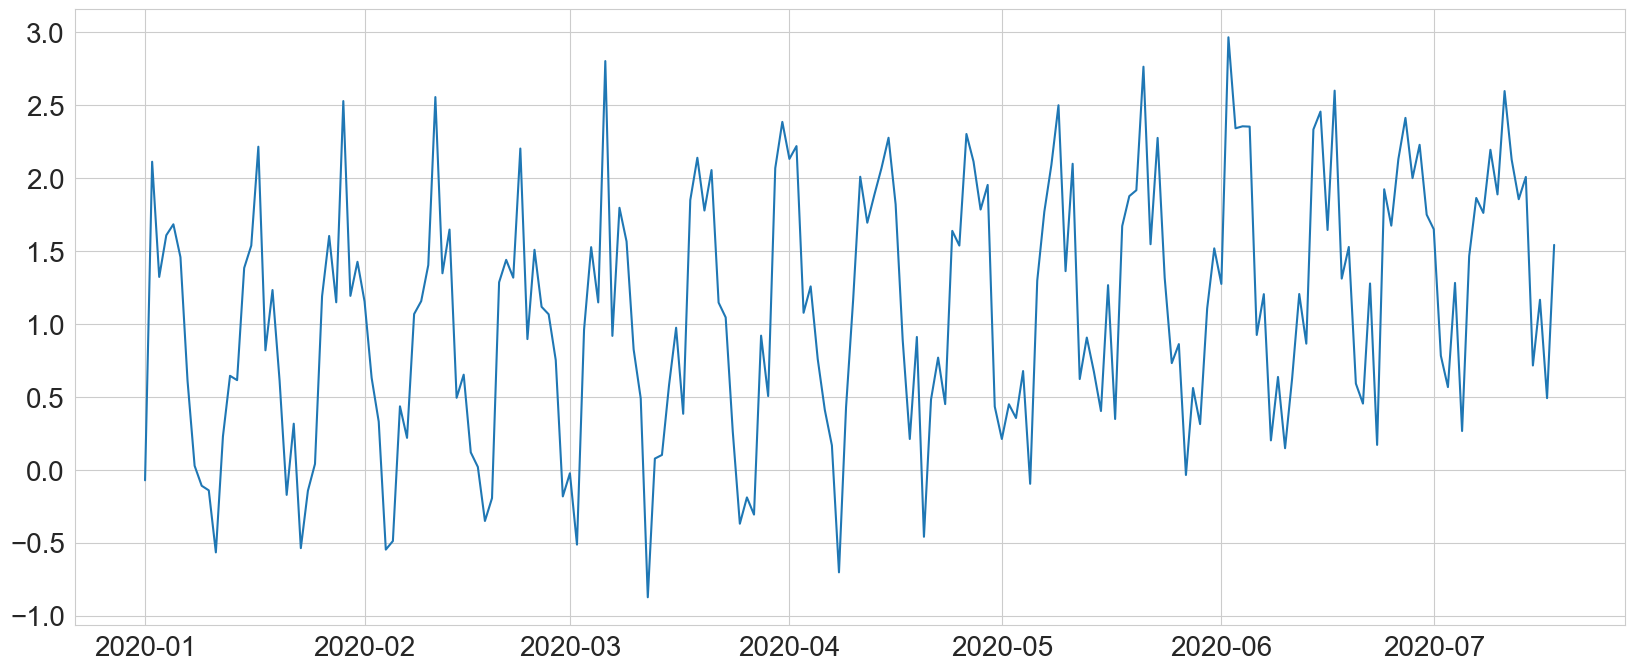

,y
2020-01-01,-0.071975
2020-01-02,2.112997
2020-01-03,1.323025
2020-01-04,1.608593
2020-01-05,1.683837
...,...
2074-09-29,101.688606
2074-09-30,101.624748
2074-10-01,101.343765
2074-10-02,101.464699


In [555]:
def generate_synthetic_data(
    n_steps: int, 
    noise_level: float = 0.1,
    include_high_freq_pattern: bool = False
    ):
    """
    We do
    """

    low_freq_patterns = [
        # lambda x: 0.01*x+1,
        lambda x: torch.sin(x) + 0.01*x,
        # lambda x: torch.sin(x) + 0.01*x + 1,
        # lambda x: (torch.sin(x)*torch.cos(x))**2,
        # lambda x: torch.abs(torch.sin(x)),
    ]

    high_freq_patterns = [
        lambda x: torch.abs(torch.sin(10*x)),
    ]

    pattern = random.choice(low_freq_patterns)
    x = torch.linspace(0, n_steps//2, n_steps)
    y = pattern(x) + noise_level * torch.randn(n_steps)
    if include_high_freq_pattern:
        pattern = random.choice(high_freq_patterns)
        y += pattern(x) + noise_level * torch.randn(n_steps)

    dates = pd.date_range(start="2020-01-01", periods=n_steps, freq="D")
    df = pd.DataFrame(y, index=dates)
    df.columns = ["y"]
    
    return df


df = generate_synthetic_data(n_steps=20000, noise_level=0.2, include_high_freq_pattern=True)

plt.plot(df["y"][:200])
plt.show()
df